     LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0            5             3           2                     0             0   
1            2            33           6                     2             0   
2            1             3           4                     0            19   
3            2             7           1                     0             0   
4           13             5           2                     4             0   
..         ...           ...         ...                   ...           ...   
311          1             3           3                     0             0   
312          6            37           2                     5             4   
313         18            14           9                     2            19   
314          5            13           4                     3             5   
315          1             3           1                     0             0   

     CONDITION_COUNT  CYCLOMATIC_COMPLE

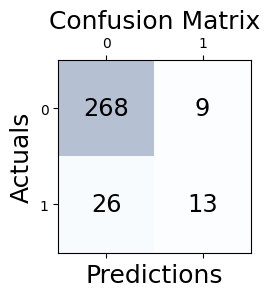

precision is: 0.5909090909090909
Recall is: 0.3333333333333333
Specificity is: 0.9675090252707581
PNV is: 0.9115646258503401
Area under curve(AUC): 0.81
              precision    recall  f1-score   support

           N       0.91      0.97      0.94       277
           Y       0.59      0.33      0.43        39

    accuracy                           0.89       316
   macro avg       0.75      0.65      0.68       316
weighted avg       0.87      0.89      0.88       316

Testing accuracy is 88.92
Misclassification Rate is:11.08
False Positive Ratio is:  0.032490974729241895
False Negative Ratio is:  0.6666666666666667
Execution Time: 17.83160690002842


In [17]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
import timeit

code_to_measure = '''

#-----------Fetching train and test data from root directory---------------#

dataset_url = "./PC3_FS_TrainData.csv"
train_data = pd.read_csv(dataset_url)
#print("*" * 20 + ' Train Data read ' + "*" * 20)
#print(train_data)

dataset_url = "./PC3_FS_TestData.csv"
test_data = pd.read_csv(dataset_url)
#print("*" * 20 + ' Test Data read ' + "*" * 20)
print(test_data);

#X_train, X_test has training & testing data
X_train=train_data.drop(columns='Defective')
print(X_train)
X_test = test_data.drop(columns='Defective')
print(X_test);

#Y_train, Y_test has train/test class lables 
Y_train = train_data["Defective"]
Y_test = test_data["Defective"]
print(Y_train)
print(Y_test)


#---------------applying voting ensemble---------------------#

voting_classifiers=[
    ['RF:',RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=500,max_features=None,random_state=0)],
    ['SVM:',svm.SVC(kernel='poly', C=2,probability=True,random_state=0)],
    ['NBG:',GaussianNB()]]
    
clf=VotingClassifier(estimators=voting_classifiers, voting='soft',verbose=1,)
print(clf.get_params())

#----------------training model--------------------------#

clf=clf.fit(X_train,Y_train)

#------------------get test predictions--------------------#

predictions = clf.predict(X_test)
#print(predictions);

#--------------generate test confusion matrix---------------#

confusion_matrix(Y_test,predictions,labels = ['N','Y'])

#--------------draw test  confusion matrix------------------#

conf_matrix = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#-----------------get evaluation matrix of testing data------------------#

#precision
precision = precision_score(Y_test,predictions,pos_label='Y')
print ("precision is: " + str(precision))

#recall
recall = recall_score(Y_test,predictions,pos_label='Y')
print ("Recall is: " + str(recall))

#specificity https://stackoverflow.com/questions/33275461/specificity-in-scikit-learn
specificity = recall_score(Y_test,predictions,pos_label='N')
print ("Specificity is: " + str(specificity))

#PNV predicted negative values_https://stackoverflow.com/questions/55622544/generate-negative-predictive-value-using-cross-val-score-in-sklearn-for-model-pe
PNV = precision_score(Y_test,predictions,pos_label='N')
print ("PNV is: " + str(PNV))


# predict probabilities
pred_prob = clf.predict_proba(X_test)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_test, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_test, predictions,pos_label='Y')

print(classification_report(Y_test,predictions))

#--------------------get testing accuracy-------------------#

testing_accuracy=accuracy_score(Y_test, predictions)
#print(testing_accuracy*100)
print("Testing accuracy is " + str(round(testing_accuracy*100,2)));

#---------------Misclassification rate----------------------#
misclassification_rate = 1-testing_accuracy
print ("Misclassification Rate is:" +str(round(misclassification_rate*100,2)));

#----------------False positive ratio----------------------#
False_positive_Ratio = 1-specificity

print ("False Positive Ratio is: ", False_positive_Ratio)

#----------------False negative ratio--------------------#
False_negative_ratio = 1-recall
print ("False Negative Ratio is: ",  False_negative_ratio)

'''

# Measure the execution time
exec_time = timeit.timeit(stmt=lambda: exec(code_to_measure), number=1)

# Print the execution time
print("Execution Time:", exec_time)


